In [54]:
print("The objective of this analysis is to predict future crime data for various divisions in Bangladesh using historical data from 2010 to 2019. Specifically, we aim to identify which division is predicted to experience the highest increase in crime rates from 2020 to 2030.")

The objective of this analysis is to predict future crime data for various divisions in Bangladesh using historical data from 2010 to 2019. Specifically, we aim to identify which division is predicted to experience the highest increase in crime rates from 2020 to 2030.


**1. Load the Dataset**

In [30]:
import pandas as pd

url = '/content/crime_data_bangladesh.csv'  # dataset
data = pd.read_csv(url)

# display first few rows dataset
print(data.head())


                 area_name  year  dacoity  robbery   murder  speedy_trial  \
0       dhaka metropolitan  2010       47     220.0     245         363.0   
1  chittagong metropolitan  2010       16     108.0      94          31.0   
2      khulna metropolitan  2010        3       9.0      29          25.0   
3    rajshahi metropolitan  2010        4      20.0      21           9.0   
4     barisal metropolitan  2010        8      12.0      19          21.0   

   riot   woman_child_Repression  kidnapping  police_assault  burglary  \
0      3                    1370         139           155.0     555.0   
1      7                     455          37            31.0     123.0   
2      0                     153          11             4.0      65.0   
3     15                     157           9            12.0      53.0   
4      0                     112           6             8.0      24.0   

    theft  other_cases  recovery_cases_arms_act  recovery_cases_explosive  \
0  1915.0      

**2.Data Preprocessing**

In [31]:
# missing values
print(data.isnull().sum())

# Drop or fill missing values
data = data.dropna()  # or data.fillna(method='ffill', inplace=True)

# encode the 'area_name' categorical variable
data = pd.get_dummies(data, columns=['area_name'], drop_first=True)


area_name                   0
year                        0
dacoity                     0
robbery                     1
murder                      0
speedy_trial                1
riot                        0
woman_child_Repression      0
kidnapping                  0
police_assault              1
burglary                    1
theft                       1
other_cases                 0
recovery_cases_arms_act     0
recovery_cases_explosive    0
recovery_cases_narcotics    0
recovery_cases_smuggling    0
dtype: int64


**3.Feature Engineering**

In [32]:
# Extract features and target variable
X = data.drop(columns=['year'])
y = data['year']

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


**4.Train-Test Split**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**5.Model Selection and Training**

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))


Mean Absolute Error: 1.3875862068965363
Mean Squared Error: 2.6492620689654713
Root Mean Squared Error: 1.627655390113482


# Forecasting Future Data

In [41]:
# Create a range of future years
future_years = range(2020, 2031)

# Prepare an empty DataFrame to store future predictions
future_predictions = []

# Iterate over each city and predict future crime data
for year in future_years:
    future_data = data[data['year'] == data['year'].max()].copy()
    future_data['year'] = year
    future_X = scaler.transform(future_data.drop(columns=['year']))
    future_pred = model.predict(future_X)
    future_data['predicted_year'] = future_pred
    future_predictions.append(future_data)

# Concatenate all future predictions into a single DataFrame
future_predictions_df = pd.concat(future_predictions)

print(future_predictions_df)


     year  dacoity  robbery   murder  speedy_trial  riot   \
129  2020        1      10.0      19          10.0      0   
130  2020        0       3.0       9           5.0      0   
131  2020        1       0.0       4           1.0      0   
132  2020        0       4.0       1           1.0      1   
133  2020        0       0.0       0           0.0      0   
..    ...      ...       ...     ...           ...    ...   
141  2030        5       8.0      29           6.0      0   
142  2030        1       2.0      33           0.0      0   
143  2030        0       1.0       2           0.0      0   
144  2030        2       3.0       3           1.0      0   
145  2030        0       0.0       1           0.0      0   

     woman_child_Repression  kidnapping  police_assault  burglary  ...  \
129                     118           9             6.0      49.0  ...   
130                      22           0             5.0       6.0  ...   
131                       8           0      

In [55]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  dataset
url = '/content/crime_data_bangladesh.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(url)

# data preprocessing
data = data.dropna()
data = pd.get_dummies(data, columns=['area_name'], drop_first=True)

# extract features and target variable
X = data.drop(columns=['year'])
y = data['year']

# normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

# Forecasting Future Data
future_year = 2030
future_data = data[data['year'] == data['year'].max()].copy()
future_data['year'] = future_year

# Prepare the future data for prediction
future_X = scaler.transform(future_data.drop(columns=['year']))

# Predict future crime data
future_predictions = model.predict(future_X)

# Create a DataFrame for the results
future_data['predicted_year'] = future_predictions

print(future_data)


Mean Absolute Error: 1.3875862068965363
Mean Squared Error: 2.6492620689654713
Root Mean Squared Error: 1.627655390113482
     year  dacoity  robbery   murder  speedy_trial  riot   \
129  2030        1      10.0      19          10.0      0   
130  2030        0       3.0       9           5.0      0   
131  2030        1       0.0       4           1.0      0   
132  2030        0       4.0       1           1.0      1   
133  2030        0       0.0       0           0.0      0   
134  2030        0       2.0       5           3.0      0   
135  2030        7      11.0      75          10.0      0   
136  2030        1       1.0      23           1.0      0   
137  2030        4      11.0      74           4.0      0   
138  2030        4       5.0      20           4.0      0   
140  2030        2       3.0      16           2.0      0   
141  2030        5       8.0      29           6.0      0   
142  2030        1       2.0      33           0.0      0   
143  2030        0      

## Visualization

Mean Absolute Error: 1.3875862068965363
Mean Squared Error: 2.6492620689654713
Root Mean Squared Error: 1.627655390113482


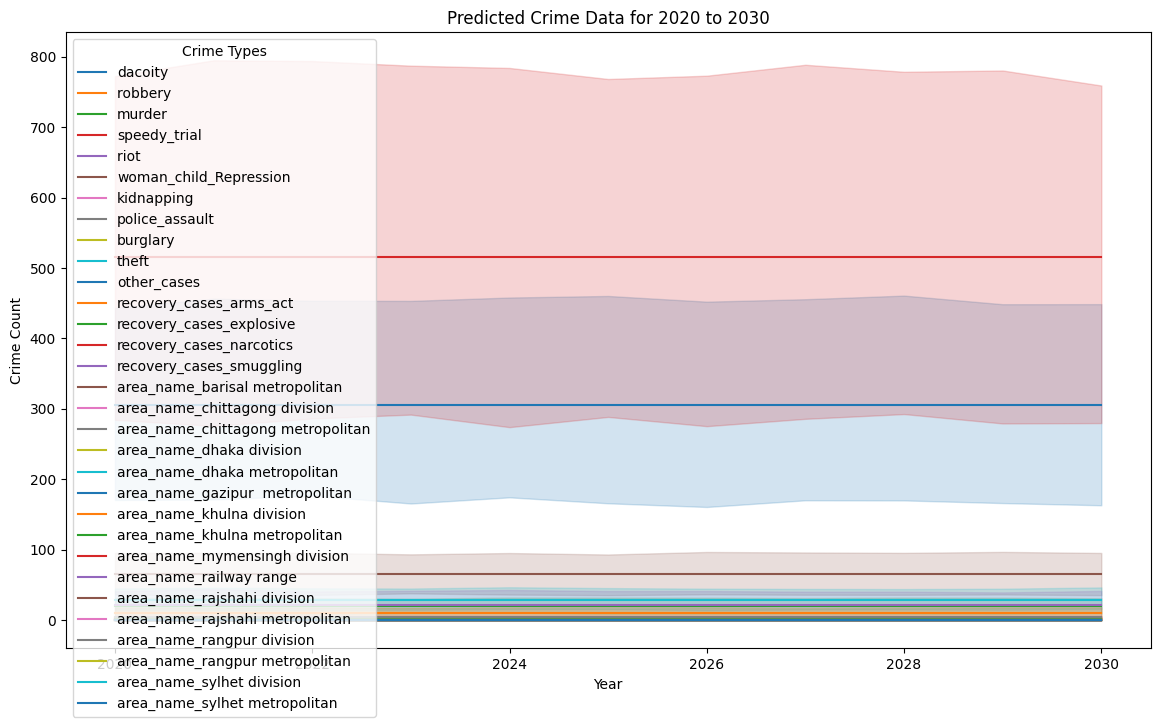

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
url = '/content/crime_data_bangladesh.csv'
data = pd.read_csv(url)

# Data Preprocessing
data = data.dropna()
data = pd.get_dummies(data, columns=['area_name'], drop_first=True)

# Extract features and target variable
X = data.drop(columns=['year'])
y = data['year']

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

#  range  future years
future_years = range(2020, 2031)

# prepare an empty DataFrame to store future predictions
future_predictions = pd.DataFrame()

# Iterate over each future year and predict crime data
for year in future_years:
    future_data = data[data['year'] == data['year'].max()].copy()
    future_data['year'] = year
    future_X = scaler.transform(future_data.drop(columns=['year']))
    future_data['predicted_year'] = model.predict(future_X)
    future_predictions = pd.concat([future_predictions, future_data])

# Visualization
plt.figure(figsize=(14, 8))
for col in data.columns[1:]:
    sns.lineplot(data=future_predictions, x='year', y=col, label=col)
plt.title('Predicted Crime Data for 2020 to 2030')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Types', loc='upper left')
plt.show()


Mean Absolute Error: 1.3875862068965363
Mean Squared Error: 2.6492620689654713
Root Mean Squared Error: 1.627655390113482


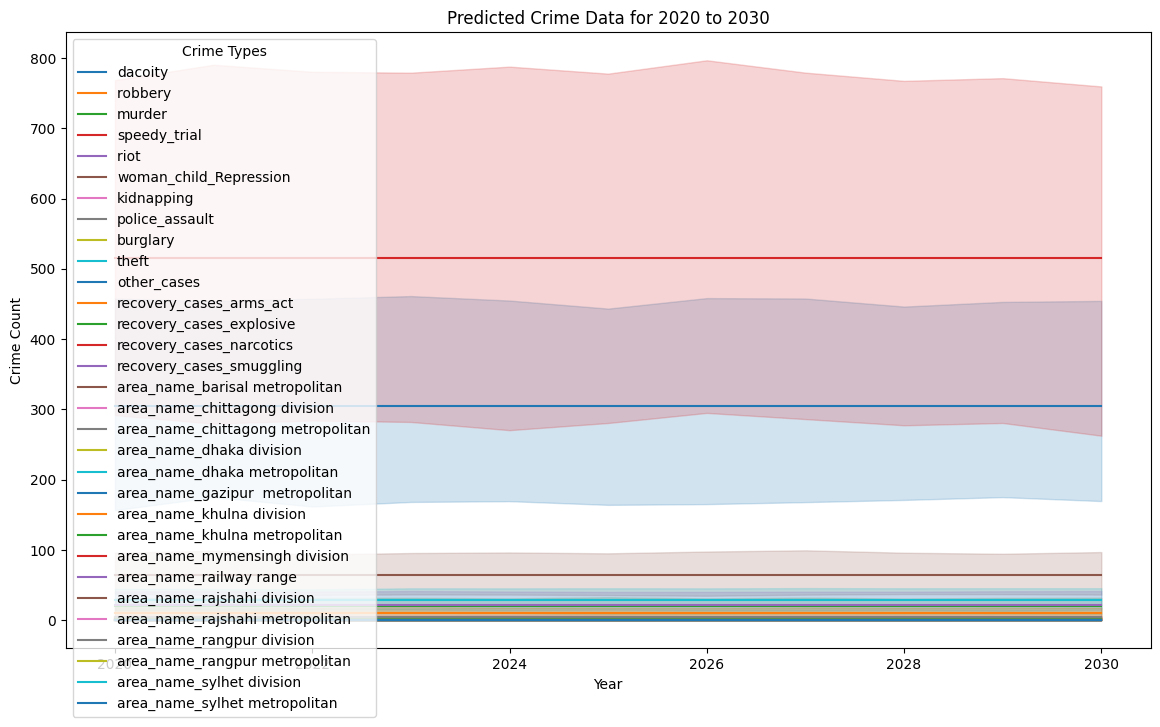

The division with the highest increase in crime rate is: dacoity


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
url = '/content/crime_data_bangladesh.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(url)

# Data Preprocessing
data = data.dropna()
data = pd.get_dummies(data, columns=['area_name'], drop_first=True)

# Extract features and target variable
X = data.drop(columns=['year'])
y = data['year']

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

# Create a range of future years
future_years = range(2020, 2031)

# Prepare an empty DataFrame to store future predictions
future_predictions = pd.DataFrame()

# Iterate over each future year and predict crime data
for year in future_years:
    future_data = data[data['year'] == data['year'].max()].copy()
    future_data['year'] = year
    future_X = scaler.transform(future_data.drop(columns=['year']))
    future_data['predicted_year'] = model.predict(future_X)
    future_predictions = pd.concat([future_predictions, future_data])

# Calculate the increase in crime rates for each division
division_increase = future_predictions.groupby('year').sum().diff().fillna(0).cumsum()

# Identify the division with the highest increase
highest_increase = division_increase.idxmax(axis=1)
highest_increase_division = highest_increase.value_counts().idxmax()

# Visualization
plt.figure(figsize=(14, 8))
for col in data.columns[1:]:
    sns.lineplot(data=future_predictions, x='year', y=col, label=col)
plt.title('Predicted Crime Data for 2020 to 2030')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Crime Types', loc='upper left')
plt.show()

print("The division with the highest increase in crime rate is:", highest_increase_division)
